In [4]:
#1st question

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df= pd.read_excel('training_mathbert.xlsx')

# Function to split the dataset into training and testing sets
def split_data(df, test_size=0.2):
    X = df.drop(columns=['output'])  # Features
    y = df['output']  # Target
    # Split the data into training and testing sets
    return train_test_split(X, y, test_size=test_size, random_state=42)

# Function to train a linear regression model
def train_linear_regression(X_train, y_train):
    # Initialize the LinearRegression model
    reg = LinearRegression()
    # Train the model
    reg.fit(X_train, y_train)
    return reg

# Function to make predictions using the trained model
def predict_values(model, X_train):
    # Predict the values for the training set
    return model.predict(X_train)

# Main program
if __name__ == "__main__":
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = split_data(df)

    # Train the linear regression model
    model = train_linear_regression(X_train, y_train)

    # Predict the values for the training set
    y_train_pred = predict_values(model, X_train)

    # Output the first few predicted values
    print("First few predictions on the training set:")
    print(y_train_pred[:5])


First few predictions on the training set:
[3.55017288 3.36154227 3.02889186 3.76962816 4.02814745]


In [6]:
#2nd question
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Function to calculate MSE, RMSE, MAPE, and R² scores
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    mape = mean_absolute_percentage_error(y_true, y_pred)  # Mean Absolute Percentage Error
    r2 = r2_score(y_true, y_pred)  # R² score
    return mse, rmse, mape, r2

# Main program
if __name__ == "__main__":
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = split_data(df)

    # Train the linear regression model
    model = train_linear_regression(X_train, y_train)

    # Predict the values for both the training and testing sets
    y_train_pred = predict_values(model, X_train)
    y_test_pred = predict_values(model, X_test)

    # Calculate metrics for the training set
    mse_train, rmse_train, mape_train, r2_train = calculate_metrics(y_train, y_train_pred)

    # Calculate metrics for the testing set
    mse_test, rmse_test, mape_test, r2_test = calculate_metrics(y_test, y_test_pred)

    # Output the results for training and testing sets
    print("Training set metrics:")
    print(f"MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAPE: {mape_train:.4f}, R²: {r2_train:.4f}")

    print("\nTesting set metrics:")
    print(f"MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, MAPE: {mape_test:.4f}, R²: {r2_test:.4f}")


Training set metrics:
MSE: 0.3445, RMSE: 0.5870, MAPE: 24193397004520.2930, R²: 0.7484

Testing set metrics:
MSE: 1.8350, RMSE: 1.3546, MAPE: 12819173086996.9004, R²: -0.3332


In [8]:
#3rd question
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Function to split the dataset into training and testing sets
def split_data(df, test_size=0.2):
    X = df.drop(columns=['output'])  # Use all attributes as features
    y = df['output']  # Target column
    # Split the data into training and testing sets
    return train_test_split(X, y, test_size=test_size, random_state=42)

# Function to train a linear regression model
def train_linear_regression(X_train, y_train):
    # Initialize the LinearRegression model
    reg = LinearRegression()
    # Train the model
    reg.fit(X_train, y_train)
    return reg

# Function to make predictions using the trained model
def predict_values(model, X_data):
    # Predict the values for the given dataset (train/test)
    return model.predict(X_data)

# Function to calculate MSE, RMSE, MAPE, and R² scores
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    mape = mean_absolute_percentage_error(y_true, y_pred)  # Mean Absolute Percentage Error
    r2 = r2_score(y_true, y_pred)  # R² score
    return mse, rmse, mape, r2

# Main program
if __name__ == "__main__":
    # Split the dataset into training and testing sets using all features
    X_train, X_test, y_train, y_test = split_data(df)

    # Train the linear regression model on the training data
    model = train_linear_regression(X_train, y_train)

    # Predict the values for the training and testing sets
    y_train_pred = predict_values(model, X_train)
    y_test_pred = predict_values(model, X_test)

    # Calculate metrics for the training set
    mse_train, rmse_train, mape_train, r2_train = calculate_metrics(y_train, y_train_pred)

    # Calculate metrics for the testing set
    mse_test, rmse_test, mape_test, r2_test = calculate_metrics(y_test, y_test_pred)

    # Output the results for the training set
    print("Training set metrics:")
    print(f"MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAPE: {mape_train:.4f}, R²: {r2_train:.4f}")

    # Output the results for the testing set
    print("\nTesting set metrics:")
    print(f"MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, MAPE: {mape_test:.4f}, R²: {r2_test:.4f}")


Training set metrics:
MSE: 0.3445, RMSE: 0.5870, MAPE: 24193397004520.2930, R²: 0.7484

Testing set metrics:
MSE: 1.8350, RMSE: 1.3546, MAPE: 12819173086996.9004, R²: -0.3332


In [10]:
#4th question

from sklearn.cluster import KMeans

# Function to remove the target variable and perform k-means clustering
def perform_kmeans_clustering(X_train, n_clusters=2):
    # Initialize the KMeans model with specified number of clusters (k)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
    
    # Fit the model on the training data
    kmeans.fit(X_train)
    
    # Return the labels and cluster centers
    return kmeans.labels_, kmeans.cluster_centers_

# Main program
if __name__ == "__main__":
    # Split the dataset into training and testing sets (ignoring 'output')
    X_train, X_test, y_train, y_test = split_data(df)

    # Perform k-means clustering on the training data (ignoring the target variable)
    kmeans_labels, kmeans_centers = perform_kmeans_clustering(X_train)

    # Output the cluster labels and cluster centers
    print("K-Means Cluster Labels for Training Set:")
    print(kmeans_labels[:10])  # Show the first 10 labels for simplicity

    print("\nK-Means Cluster Centers:")
    print(kmeans_centers)


K-Means Cluster Labels for Training Set:
[1 1 1 1 0 1 1 1 1 1]

K-Means Cluster Centers:
[[-2.86091153e-01  1.46494722e-01  6.72568498e-02  2.20422883e-01
  -4.22855402e-01 -2.18234024e-01  6.90933595e-04  2.00970478e-01
   6.63337462e-02  1.59181328e-02  2.59102472e-01 -7.17745018e-02
   5.23582990e-02  6.32862917e-02 -5.10324010e-02  1.83006448e-01
  -6.74032965e-01  1.16027438e-01 -4.41915534e-01  6.90597196e-02
  -9.13174893e-02 -2.87932430e-01 -1.73863753e-01 -9.08758263e-02
   1.25681099e-01  2.57493588e-01  5.88084567e-02  2.91031053e-01
   2.25878212e-01 -1.00471103e-01  3.47946902e-01  9.91065077e-02
   2.99092761e-01  1.36757206e-02  4.82632788e-02 -2.21916860e-01
  -1.13338155e-01  1.99081415e-01  1.11680606e-01  3.58926027e-02
  -7.77895213e-02  7.78698853e-02  1.38426885e-01  6.71554217e-02
   1.62279618e-01 -2.85107694e-01  2.65355663e-02  2.17618780e-01
   8.15161739e-02 -1.56569317e-01  3.88977903e-02  8.62517841e-02
   4.58711374e-02 -1.17422218e-01 -2.43743724e-01  1.

C:\Users\bvdin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [12]:
#5th question

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

# Function to perform k-means clustering and return labels
def perform_kmeans_clustering(X_train, n_clusters=2):
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
    kmeans.fit(X_train)
    
    # Return the fitted model and the labels
    return kmeans, kmeans.labels_

# Function to calculate clustering scores
def calculate_clustering_scores(X_train, labels):
    silhouette = silhouette_score(X_train, labels)  # Silhouette Score
    ch_score = calinski_harabasz_score(X_train, labels)  # Calinski-Harabasz Score
    db_index = davies_bouldin_score(X_train, labels)  # Davies-Bouldin Index
    return silhouette, ch_score, db_index

# Main program
if __name__ == "__main__":
    # Split the dataset into training and testing sets (ignoring 'output')
    X_train, X_test, y_train, y_test = split_data(df)

    # Perform k-means clustering on the training data (k=2)
    kmeans_model, kmeans_labels = perform_kmeans_clustering(X_train)

    # Calculate clustering evaluation metrics
    silhouette, ch_score, db_index = calculate_clustering_scores(X_train, kmeans_labels)

    # Output the clustering scores
    print("Clustering Evaluation Metrics for Training Set:")
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Calinski-Harabasz Score: {ch_score:.4f}")
    print(f"Davies-Bouldin Index: {db_index:.4f}")


Clustering Evaluation Metrics for Training Set:
Silhouette Score: 0.1002
Calinski-Harabasz Score: 105.9867
Davies-Bouldin Index: 2.5705


C:\Users\bvdin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


C:\Users\bvdin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\bvdin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\bvdin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\bvdin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

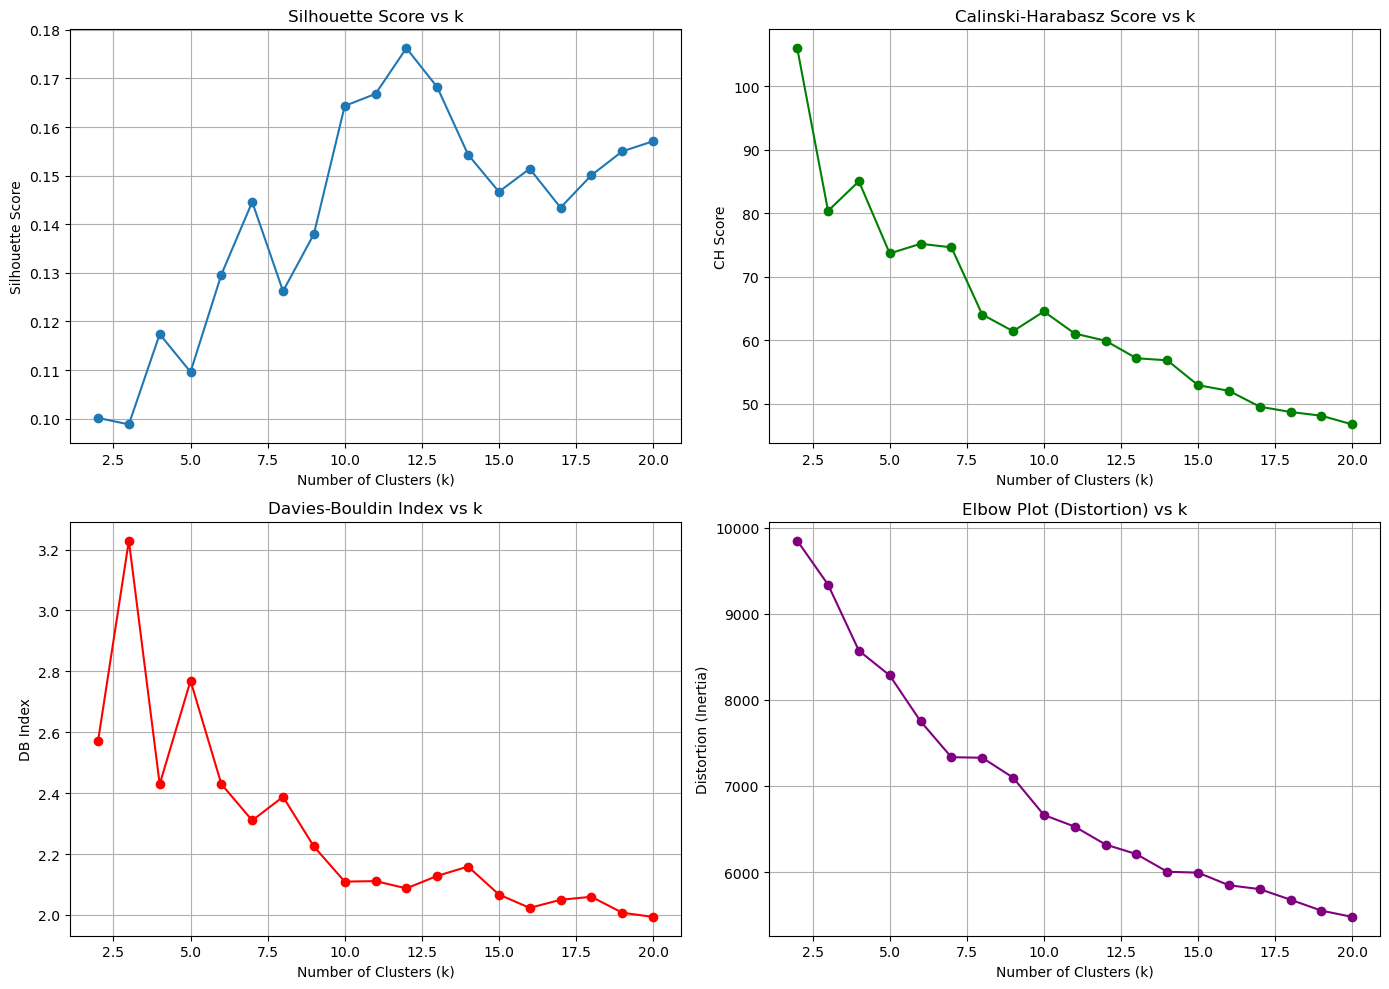

In [14]:
#6th question

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Function to perform k-means clustering and return labels and inertia
def perform_kmeans_clustering(X_train, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
    kmeans.fit(X_train)
    return kmeans, kmeans.labels_, kmeans.inertia_

# Function to calculate clustering evaluation scores
def calculate_clustering_scores(X_train, labels):
    silhouette = silhouette_score(X_train, labels)
    ch_score = calinski_harabasz_score(X_train, labels)
    db_index = davies_bouldin_score(X_train, labels)
    return silhouette, ch_score, db_index

# Main program
if __name__ == "__main__":
    # Split the dataset into training and testing sets (ignoring 'output')
    X_train, X_test, y_train, y_test = split_data(df)

    # Lists to store the results for different k values
    ks = list(range(2, 21))  # Evaluate for k values from 2 to 20
    silhouette_scores = []
    ch_scores = []
    db_indexes = []
    distortions = []

    # Perform k-means clustering for different values of k
    for k in ks:
        kmeans_model, kmeans_labels, inertia = perform_kmeans_clustering(X_train, n_clusters=k)
        
        # Store inertia (for Elbow Plot)
        distortions.append(inertia)
        
        # Calculate clustering evaluation metrics
        silhouette, ch_score, db_index = calculate_clustering_scores(X_train, kmeans_labels)
        
        # Store metrics for plotting
        silhouette_scores.append(silhouette)
        ch_scores.append(ch_score)
        db_indexes.append(db_index)

    # Plot the metrics against k values
    plt.figure(figsize=(14, 10))

    # Silhouette Score Plot
    plt.subplot(2, 2, 1)
    plt.plot(ks, silhouette_scores, marker='o', label='Silhouette Score')
    plt.title("Silhouette Score vs k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.grid(True)

    # Calinski-Harabasz Score Plot
    plt.subplot(2, 2, 2)
    plt.plot(ks, ch_scores, marker='o', label='CH Score', color='green')
    plt.title("Calinski-Harabasz Score vs k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("CH Score")
    plt.grid(True)

    # Davies-Bouldin Index Plot
    plt.subplot(2, 2, 3)
    plt.plot(ks, db_indexes, marker='o', label='DB Index', color='red')
    plt.title("Davies-Bouldin Index vs k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("DB Index")
    plt.grid(True)

    # Elbow Plot (Distortions)
    plt.subplot(2, 2, 4)
    plt.plot(ks, distortions, marker='o', label='Inertia', color='purple')
    plt.title("Elbow Plot (Distortion) vs k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Distortion (Inertia)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


C:\Users\bvdin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\bvdin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\bvdin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\bvdin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

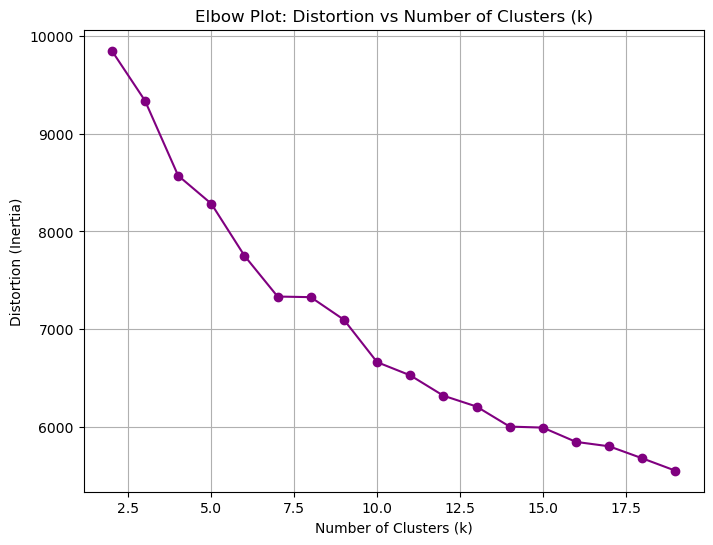

In [16]:
#7th question

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to perform k-means clustering and return the inertia (distortion)
def perform_kmeans_inertia(X_train, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
    kmeans.fit(X_train)
    return kmeans.inertia_

# Main program
if __name__ == "__main__":
    # Split the dataset into training and testing sets (ignoring 'output')
    X_train, X_test, y_train, y_test = split_data(df)

    # List to store the distortions (inertia) for each value of k
    distortions = []
    ks = list(range(2, 20))  # Evaluate for k values from 2 to 19

    # Loop over different values of k and compute inertia (distortion)
    for k in ks:
        inertia = perform_kmeans_inertia(X_train, n_clusters=k)
        distortions.append(inertia)

    # Plot the Elbow Plot (Inertia vs k)
    plt.figure(figsize=(8, 6))
    plt.plot(ks, distortions, marker='o', linestyle='-', color='purple')
    plt.title("Elbow Plot: Distortion vs Number of Clusters (k)")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Distortion (Inertia)")
    plt.grid(True)
    plt.show()
